# Black or White Line on Image

Aussi appelé ligne de pixels morts ou chauds

**Pour reproduire l'effet de defect pîxels, nous allons effectuer:**

- selection d'une ligne sur l'image de base
- créer une ligne noir ou blanche
- mettre la ligne sur l'image

[code etienne](#Essai-de-reconnaissance-de-la-ligne)

In [41]:
%matplotlib inline

import os
import sys
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFilter
from scipy import ndimage
from skimage import data, filters, measure, feature
from base_functions import *

In [2]:
DATASET_PATH = os.path.join(os.getcwd(), "input") # chemin dossier contenant les images cleans
random.seed(42)

In [3]:
def _CreateDefect(IMG_PATH, name):
    image = Image.open(IMG_PATH)
    
    width, height = image.size
    y = random.randint(0, height)
    color = random.randint(0,1)

    img_np = np.array(image)
    
    img_np[y,:,:] = color*255
    
    Image.fromarray(img_np).save('output/'+ name + '_defectline' + '.png') # 'output/' do
    print(y)

In [4]:
for file in os.listdir(DATASET_PATH):
    if(file.__contains__('jpg')):
        name = file.split('.')[0]
        _CreateDefect(DATASET_PATH + "\\" + file, name)

114
281
228
104


In [5]:
def defectCorrection(h, IMG_PATH):
    img_defect = np.array(Image.open(IMG_PATH))
    display(Image.fromarray(img_defect))
    
    mean_convol = np.array(
            [
                [0,0,1/2,0,0],
                [0,0,0,0,0],
                [0,0,0,0,0],
                [0,0,0,0,0],
                [0,0,1/2,0,0]
            ])

    img_solve = np.zeros((img_defect.shape[0], img_defect.shape[1], img_defect.shape[2]))

    img_solve[:,:,0] = ndimage.filters.convolve(img_defect[:,:,0], mean_convol)
    img_solve[:,:,1] = ndimage.filters.convolve(img_defect[:,:,1], mean_convol)
    img_solve[:,:,2] = ndimage.filters.convolve(img_defect[:,:,2], mean_convol)

    img_finale = np.copy(img_defect)
    img_finale[h,:,:] = img_solve[h,:,:]

    display(Image.fromarray(img_finale))
    Image.fromarray(img_finale).save('output/solve.jpg')

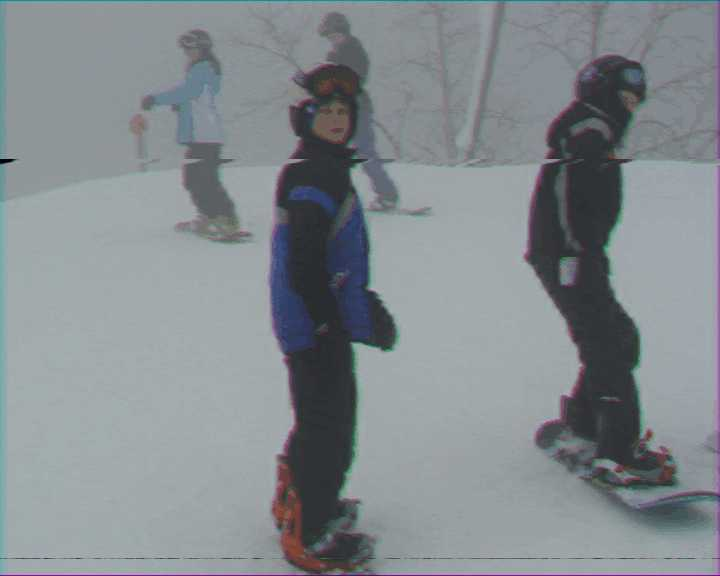

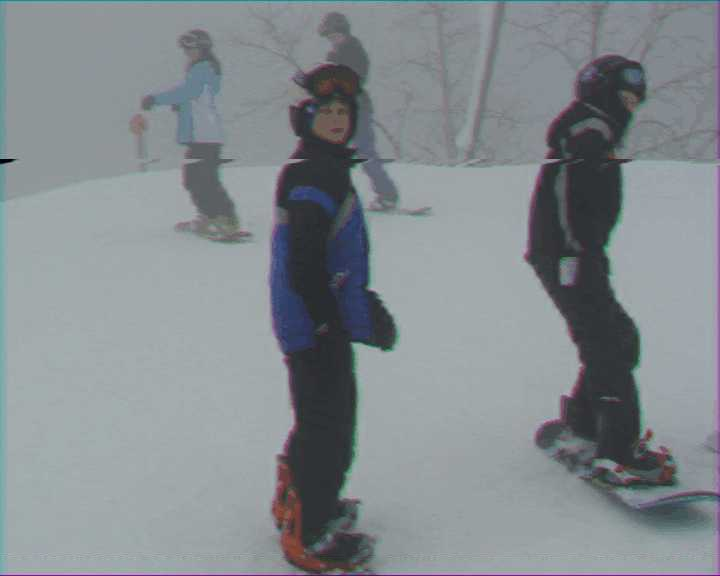

In [6]:
defectCorrection(558,'output/000000055517.jpg')

## Essai de reconnaissance de la ligne

*non efficace pour mon problème*

**finalement, cela aidera Etienne**

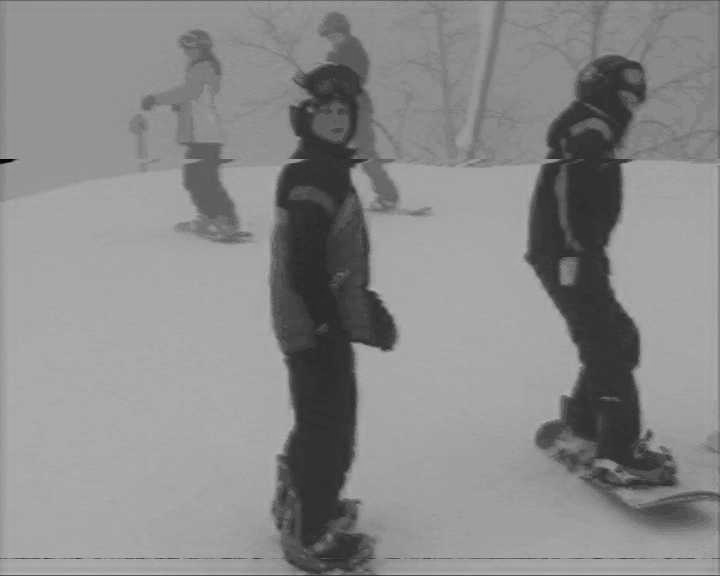

In [7]:
img = cv2.imread('output/000000055517.jpg')
img_gray = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = 'uint8')

img_gray[:,:,0] = np.mean(img, axis = 2)
img_gray[:,:,1] = img_gray[:,:,0]
img_gray[:,:,2] = img_gray[:,:,0]

display(Image.fromarray(img_gray))

In [8]:
img_min = np.min(img_gray)
img_max = np.max(img_gray)

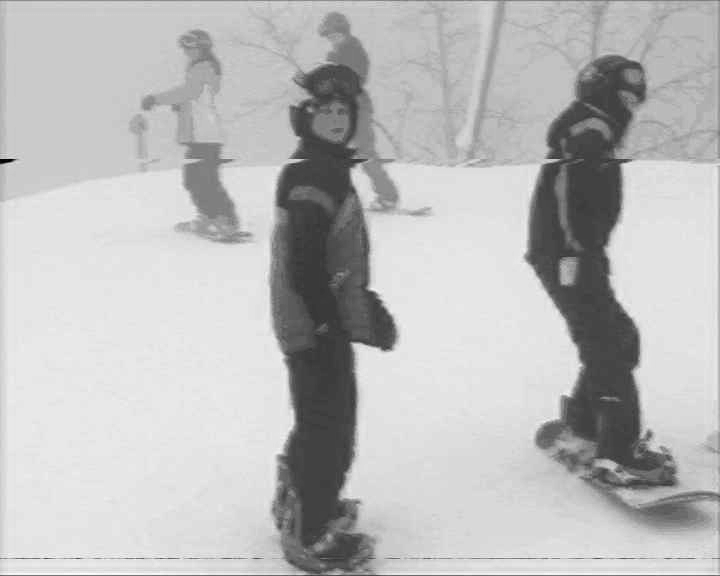

In [9]:
img_transform = (img_gray - img_min) * 255.0 / (img_max - img_min)
img_transform = img_transform.astype('uint8')

display(Image.fromarray(img_transform))
Image.fromarray(img_transform).save('output/gray1.jpg')

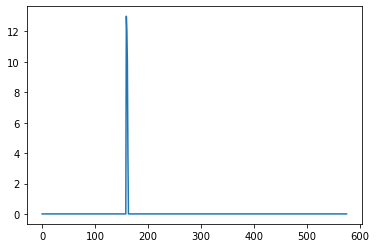

In [10]:
threshold = 20
mask = np.where((img_transform[:,:,0] < threshold) & (img_transform[:,:,1] < threshold) & (img_transform[:,:,2] < threshold), 1, 0)
hist = np.sum(mask, axis=1)

plt.plot(hist)

13 159


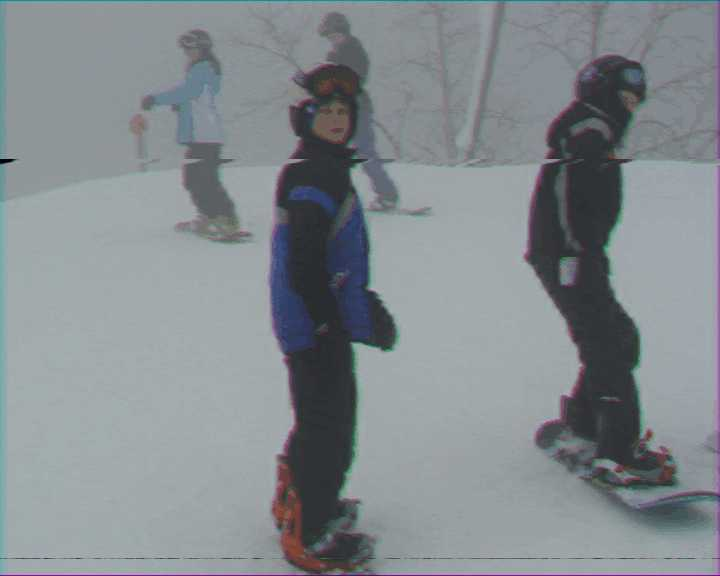

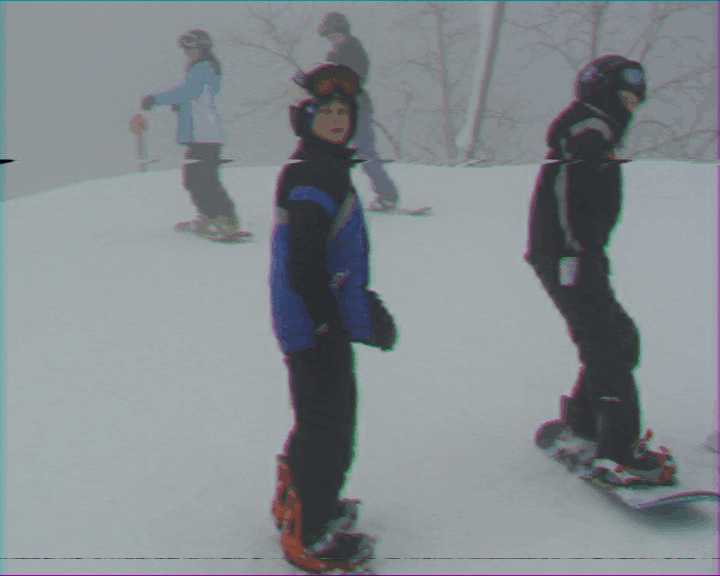

In [11]:
print(np.amax(hist), np.argmax(hist))
h_hist = np.argmax(hist)

defectCorrection(h_hist,'output/000000055517.jpg')

#### Test par filtre contour

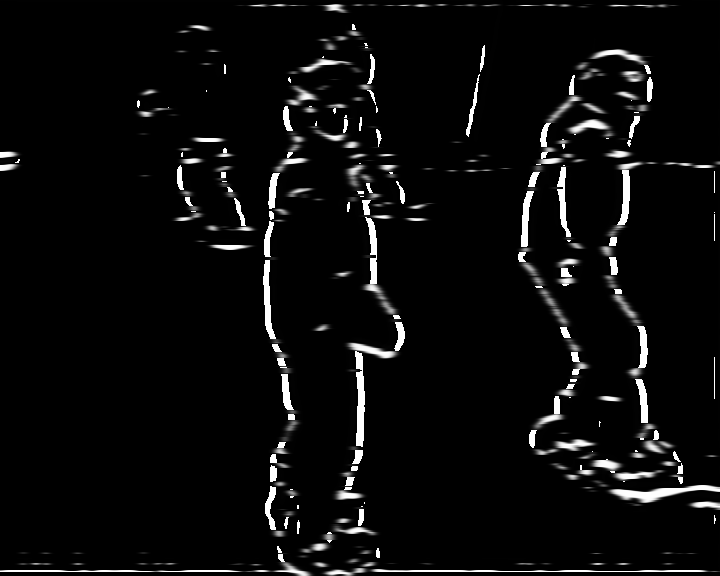

In [12]:
img_contour = ndimage.gaussian_laplace(img_transform, sigma = 3)

display(Image.fromarray(img_contour.astype('uint8')))

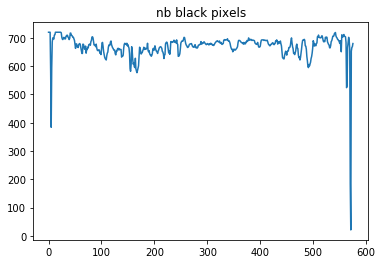

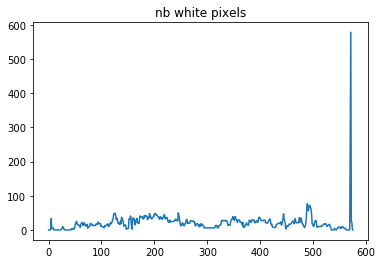

0 571


In [13]:
black_max = get_blackpix_by_line(img_contour, 30)
white_max = get_whitepix_by_line(img_contour, 230)

print(black_max, white_max)

##### Conclusion

Pourais être efficace mais a cause des abérations chromatique crée un contour plus important ce qui m'empèche de trouver la ligne à modifier